Laboratorio 4
Se tiene la siguiente ecuación:
$$
s =  \sum_{n=1}^{N} \frac{1}{n^{3}+3n+1}a^b
$$


La cual es una sumatoria en donde N∈N, a y b∈ R. Además, se sabe que N es un número que como máximo debe ser 4 294 967 295 y que tanto a como b no requieren mucha resolución.

Se le pide realizar un análisis comparativo entre funciones en Python y C. El programa en C debe incluir lo siguiente:

a) (1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función usar la función pow para el cálculo del denominador y para el cálculo de a^b.

In [69]:
%%file funcion1C.c
#include <math.h>
float sumatoria1(unsigned int  N, float a, float b){

    float s=0.0;
    for (int n=1;n<=N;n++){
        float numerador= pow(a,b);
        float denominador = pow(n,3)+3*n+1;
        s = s + numerador/denominador;

    }
    
    return s;

}

Overwriting funcion1C.c


b) (1.0 punto) Una función que reciba como argumentos de entrada los valores de N, a y b, y retorne el valor de s como salida. Para esta función solo usar la función pow para el cálculo de a^b.

In [70]:
%%file funcion2C.c
#include <math.h>
float sumatoria2(unsigned int  N, float a, float b){

    float s=0.0;
    for (int n=1;n<=N;n++){
        float numerador= pow(a,b);
        float denominador = n*n*n+3*n+1;
        s = s + numerador/denominador;

    }
    
    return s;

}

Overwriting funcion2C.c


Un programa principal en Python donde se debe incluir:

c) (1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función usar la función pow para el cálculo del denominador y para el cálculo de a^b.


In [71]:

def funcion1py( N,a,b):

    s = 0.0
    for n in range (1,N+1):

        numerador= pow(a,b)
        denominador= pow(n,3)+3*n+1
        s = s + numerador/denominador
    
    return s

d) (1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función solo usar la función pow para el cálculo de a^b.


In [72]:
def funcion2py( N,a,b):

    s = 0.0
    for n in range (1,N+1):

        numerador= pow(a,b)
        denominador= n*n*n+3*n+1
        s = s + numerador/denominador
    
    return s

e) (2.0 punto) El llamado a la librería generada en C y los respectivos argumentos de entrada y de salida. Además, en comentarios, debe justificar los tipos de datos utilizados.



In [73]:
import ctypes

! gcc -shared -o funcion1C.so funcion1C.c
! gcc -shared -o funcion2C.so funcion2C.c

lib1 = ctypes.CDLL('./funcion1C.so')
lib2 = ctypes.CDLL('./funcion2C.so')

lib1.sumatoria1.argtypes = [ctypes.c_uint,ctypes.c_float,ctypes.c_float]
lib1.sumatoria1.restype = ctypes.c_float


lib2.sumatoria2.argtypes = [ctypes.c_uint,ctypes.c_float,ctypes.c_float]
lib2.sumatoria2.restype = ctypes.c_float





f) (2.0 puntos) Validar que las 4 funciones dan los mismos resultados para los valores 1000, 3.5 y -0.25 para N,a y b, respectivamente.


In [74]:
a= lib1.sumatoria1(1000,3.5,-0.25)

b= lib2.sumatoria2(1000,3.5,-0.25)

c= funcion1py(1000,3.5,-0.25)

d= funcion2py(1000,3.5,-0.25)

print("El valor de la funcion 1 en c es : ",a)
print("El valor de la funcion 2 en c es : ",b)
print("El valor de la funcion 1 en python es : ",c)
print("El valor de la funcion 2 en python es : ",d)

El valor de la funcion 1 en c es :  0.2408149689435959
El valor de la funcion 2 en c es :  0.2408149689435959
El valor de la funcion 1 en python es :  0.24081597314253553
El valor de la funcion 2 en python es :  0.24081597314253553


g) (2.0 puntos) Realizar un análisis temporal de las 4 funciones considerando los datos del inciso f). Considerar graficar los tiempos para un valor de 50 iteraciones. Realizar comentarios acerca del resultado.


Text(0.5, 0, 'Iteraciones')

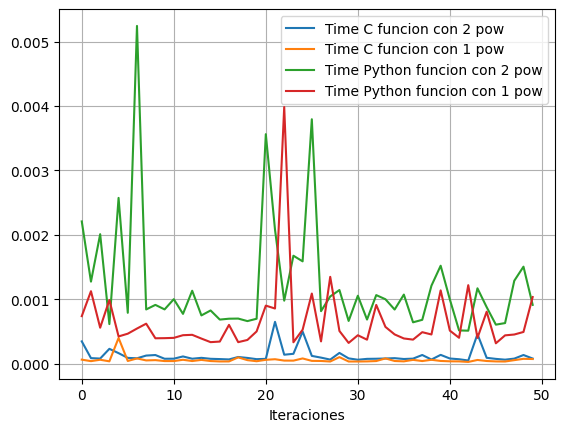

In [85]:
import statistics
import matplotlib.pyplot as plt
import time

iteraciones=50

time1c_2pow=[]
time2c_1pow=[]
time1py_2pow=[]
time2py_1pow=[]

N=1000
a=3.5
b=-2.5
for i in range(iteraciones):

    tic1= time.perf_counter()
    lib1.sumatoria1(N,a,b)
    toc1= time.perf_counter()
    lib2.sumatoria2(N,a,b)
    tic2= time.perf_counter()
    funcion1py(N,a,b)
    toc2= time.perf_counter()
    funcion2py(N,a,b)
    tic3= time.perf_counter()
    
    time1c_2pow.append( toc1 -tic1)
    time2c_1pow.append( tic2 -toc1)
    time1py_2pow.append( toc2 -tic2)
    time2py_1pow.append( tic3 -toc2)



plt.plot(time1c_2pow)
plt.plot(time2c_1pow)
plt.plot(time1py_2pow)
plt.plot( time2py_1pow)
plt.grid()
plt.legend(["Time C funcion con 2 pow","Time C funcion con 1 pow","Time Python funcion con 2 pow","Time Python funcion con 1 pow"])
plt.xlabel("Iteraciones")


h) (2.0 puntos) Realizar un análisis temporal de las 4 funciones considerando N=1024,2048,4096,8192,16384,32768. Considerar 50 iteraciones para cada N. Graficar el resultado y brindar comentarios acerca del resultado.


In [90]:
tamanos= [1024,2048,4096,8192,16384,32768]

import statistics
import matplotlib.pyplot as plt
import time

lista_funcion1_N=[]
lista_funcion2_N=[]
lista_funcion3_N=[]
lista_funcion4_N=[]

for N in tamanos:
        
    iteraciones=50
    time1c_2pow=[]
    time2c_1pow=[]
    time1py_2pow=[]
    time2py_1pow=[]

    for i in range(iteraciones):
            
        tic1= time.perf_counter()
        lib1.sumatoria1(N,a,b)
        toc1= time.perf_counter()
        lib2.sumatoria2(N,a,b)
        tic2= time.perf_counter()
        funcion1py(N,a,b)
        toc2= time.perf_counter()
        funcion2py(N,a,b)
        tic3= time.perf_counter()
            
        time1c_2pow.append( toc1 -tic1)
        time2c_1pow.append( tic2 -toc1)
        time1py_2pow.append( toc2 -tic2)
        time2py_1pow.append( tic3 -toc2)

    lista_funcion1_N.append(statistics.median(time1c_2pow))
    lista_funcion2_N.append(statistics.median(time2c_1pow))
    lista_funcion3_N.append(statistics.median(time1py_2pow))
    lista_funcion4_N.append(statistics.median(time2py_1pow))


print(lista_funcion1_N)

[0.00017267349903704599, 0.0002984650018333923, 0.0005740505002904683, 0.0012310800011618994, 0.0025101939972955734, 0.004936244498821907]


i) (3.0 puntos) Calcular y graficar el SpeedUP para los mismos rangos de N del inciso anterior. Considerar que el SpeedUP debe ser entre las funciones análogas entre las funciones en C y Python. Realizar comentarios acerca de sus resultados

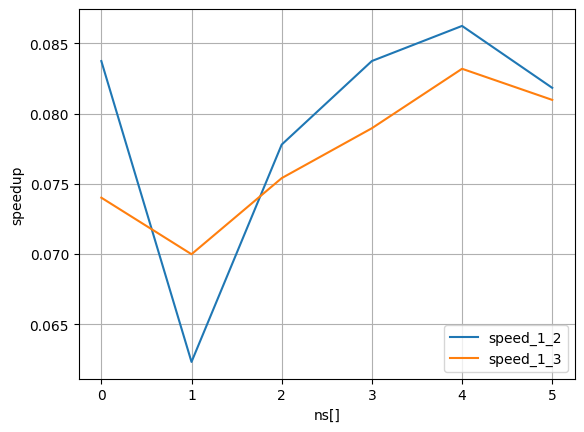

In [92]:
speed1_3 = [i / j for i, j in zip(lista_funcion1_N, lista_funcion3_N)]
speed2_4 = [i / j for i, j in zip(lista_funcion2_N, lista_funcion4_N)]


plt.plot([0,1,2,3,4,5],speed1_3[:],label='speed_1_2')
plt.plot([0,1,2,3,4,5],speed2_4[:],label='speed_1_3')


plt.xlabel("ns[]")
plt.ylabel("speedup")
plt.grid()
plt.legend()